# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


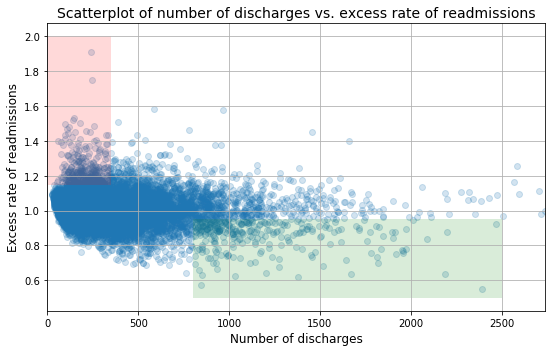

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I **do not** agree with the above analysis and recommendations.

**1)** Deriving conclusions from just charts does not capture the entire picture. Conclusions were not tested for statistical significance nor was a correlation coefficient calculated.

**2)** The footnote column was not cleaned properly.

**3)** As mentioned above, without a hypothesis, the conclusions lacks probabilistic and significance support.

**4)** Groups were left out with the 63% and 44% excess readmission rate.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

*Null Hypothesis:* The difference between the means of hospital capacity and readmission rates **EQUALS** 0

*Alternative Hypothesis:* The difference between the means of hospital capacity and readmission rates **DOES NOT EQUAL** 0

### 2. Compute and report the observed significance value (or p-value)

In [5]:
# Create new cleaned dataframe

df = hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
df = df[df['Number of Readmissions'].notnull()]
df['Number of Discharges']=pd.to_numeric(df['Number of Discharges'])

In [6]:
df.corr() # Correlation matrix

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [7]:
#Correlation between number of discharges and excess readmission rate
r = -0.097398

# R-Squared value
r_squared = r**2
print("Pearson Correlation Coefficent of",r_squared)

Pearson Correlation Coefficent of 0.009486370404


In [8]:
# Number of hospitals
n = df.shape[0]

P-Value will be calculated with t-statistic, Pearson Correlation Coefficient, and degrees of freedom. This will be compared with alpha = .05

In [9]:
t = (r*((n-2)/(1-r**2))**0.5) # t-statistic
print("T-score of", t)

T-score of -10.492386957113085


In [10]:
degreef = n-2 # degrees of freedom
print(degreef, "degrees of freedom")

11495 degrees of freedom


In [11]:
import scipy.stats as stats
p = stats.t.sf(np.abs(t), degreef)*2  # two-sided p-value
print("P-value of",p)

P-value of 1.2224686234119185e-25


Since the p-value is **less than .05** (our significance level), we **reject** our null hypotesis and assume that the difference between hospital capacity and readmission rates **does not equal to 0**.

### 3. Report statistical significance for  α  = .01.

Since the p-value is **less than .01** (our **NEW** significance level), we **reject** our null hypotesis and assume that the difference between hospital capacity and readmission rates **does not equal to 0**. 

Changing our statistical significance level now (not best practice), still **does not** change our outcome.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

First, our correlation coefficient equals to .0095 which is an **extremely small correlation**. Thus, when we are looking at *statistical significance*, our value of .0095 **is statistical significant** with a p-value of close to zero. This means that we can assume that the difference between hospital capacity and readmission rates does **NOT EQUAL** 0 (.0095 != 0).

But *practically speaking* (practical significance), **less than 1%** of the variability in excess readmission ratio can be explained by number of discharges.

With that said, we will look at two sets of data split by hospitals with **less than 1% excess readmission ratio** and the other with **greater than 1% excess readmission ratio** and test the statistical significance between the two.

In [12]:
# Split hospitals into the two groups (ERR <= 1 and ERR > 1)

hosp1= df[df['Excess Readmission Ratio']<=1]
hosp2= df[df['Excess Readmission Ratio']>1]

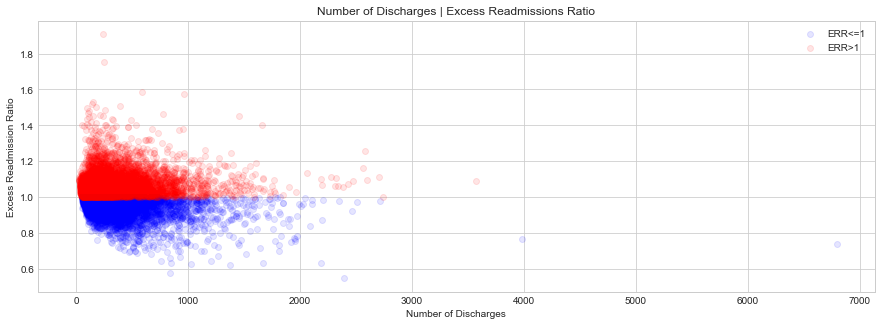

In [13]:
import seaborn as sns
sns.set_style('whitegrid') # Set plot theme
plt.figure(figsize=(15,5)) # Set size

plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.1)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges | Excess Readmissions Ratio')
plt.legend()

In [14]:
# Difference in mean of number of discharges
mean_diff = 381.30 - 350.652635

# Standard deviation for difference in mean of # of discharges
std_diff = np.sqrt((322.75**2/5558) + (294.31**2/5939))

# Margin of Error using 0.05 significance level  
moe = 1.96*std_diff

In [15]:
# Confidence interval for difference in # of discharges
ci = mean_diff + np.array([-1, 1]) * moe
print("95% confidence interval of", ci)

95% confidence interval of [19.33244468 41.96228532]


In [16]:
# Degrees of freedom
n1 = 5558 
n2 = 5939 
H1 = (322.753963**2)/n1
H2 = (294.31**2)/n2
DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))

# T-score
t_score=(mean_diff-0)/std_diff

# P-value
p_value = stats.t.sf(np.abs(t_score), DF)*2  # two-sided pvalue
print("P-value of", p_value)

P-value of 1.1244584984133134e-07


With a p-value of less than our significance level (.05) and even a significance level of .01, it is statistically significant that **there is a difference** between the number of discharges with excess readmission ratio that is less than 1 compared to those with excess readmission ratio of greater than 1.

We are confident that the difference in mean of number of discharges **falls between 19.33 and 41.96**, *95% of the time*.

### 5a: What are the advantages and disadvantages of using this plot to convey information?

**Advantages:** There is clear labeling of the y-axis and x-axis as well as the title and legend. Overall it conveys the data appropriately and clearly.

**Disadvantages:** It is difficult seeing the trend between number of discharges and excess readmission ratio.

### 5b: Construct another plot that conveys the same information in a more direct manner.

In [17]:
# Trend Line Calculations
from scipy import stats  
x=df['Number of Discharges']
y=df['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [18]:
print(slope, intercept, r_value, p_value, std_err)

-2.9010517330570684e-05 1.018106147373357 -0.09739794351079352 1.2225473776734486e-25 2.764912734911058e-06


In [19]:
X = df['Number of Discharges'].sort_values()
trend_line = slope*X + intercept

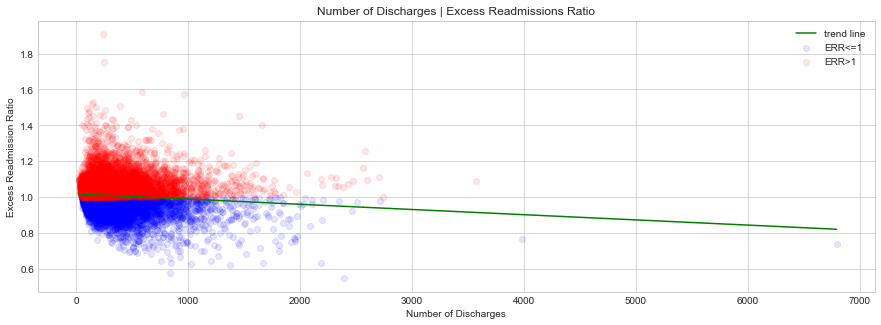

In [20]:
plt.figure(figsize=(15,5)) # Set size
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.1)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, trend_line, c='g', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges | Excess Readmissions Ratio')
plt.legend()